# <center> Початковий аналіз даних з Pandas</center>
## <center>Практичне завдання. Аналіз даних пасажирів "Титаніка"</center>

**Заповніть код в клітинках і дайте відповідь на питання**

In [ ]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white")  
sns.set(style="whitegrid", color_codes=True)


**Зчитаємо дані з файла в память у вигляді об'єкта Pandas.DataFrame**

In [ ]:
data = pd.read_csv('titanic_train.csv',
                  index_col='PassengerId')

**Дані представлені у вигляді таблиці. Подивимось на перші 5 рядків:**

In [ ]:
data.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Для прикладу відберемо пасажирів, які сіли в Cherbourg (Embarked=C) і заплатили більше 200 у.е. за квиток (fare > 200).**

Переконайтесь, що Ви розумієте, як ця конструкція працює. <br>
Якщо ні – подивіться, як вичисляється вираз в квадратних душках.

In [ ]:
data[(data['Embarked'] == 'C') & (data.Fare > 200)].head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C
312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5000,C82,C


**Можна відсортувати цих людей по спаданню плати за квиток.**

In [ ]:
data[(data['Embarked'] == 'C') & 
     (data['Fare'] > 200)].sort_values(by='Fare',
                               ascending=False).head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C


**Приклад створення признака.**

In [ ]:
def age_category(age):
    '''
    < 30 -> 1
    >= 30, <55 -> 2
    >= 55 -> 3
    '''
    if age < 30:
        return 1
    elif age < 55:
        return 2
    else:
        return 3

In [ ]:
age_categories = [age_category(age) for age in data.Age]

In [ ]:
data['Age_category'] = age_categories

**Другий спосіб – через `apply`.**

In [ ]:
data['Age_category'] = data['Age'].apply(age_category)

**1. Скільки чоловіків / жінок находилось на борту?**
- 412 чоловіків і 479 жінок
- 314 чоловіків і 577 жінок
- 479 чоловіків і 412 жінок
- 577 чоловіків і 314 жінок

In [ ]:
print( data['Sex'].value_counts()['male'])
print( data['Sex'].value_counts()['female'])

577
314


**2. Виведіть розподіл змінної `Pclass` (соціально-економічний статус) і цей ж розподіл, тільки для чоловіків / жінок окремо. Скільки було чоловіків в 2-гому класі?**
- 104
- 108
- 112
- 125

In [ ]:
table=pd.crosstab(data['Sex'], data['Pclass'])
print(table)

Pclass    1    2    3
Sex                  
female   94   76  144
male    122  108  347


**3. Які медіана і стандартне відхилення платежів (`Fare`)? Округліть до 2 знаків після коми.**
- Медіана – 14.45, стандартне відхилення – 49.69
- Медіана – 15.1, стандартне відхилення – 12.15
- Медіана – 13.15, стандартне відхилення – 35.3
- Медіана – 17.43, стандартне відхилення – 39.1

In [ ]:
sort = sorted(data["Fare"])
print(round(sort[446], 2))
fare = np.std(data["Fare"])
print(round(fare, 2))


14.45
49.67


**4. Правда, що люди молодші 30 років виживали частіше, ніж люди старші 60 років? Які долі виживших в обох групах?**
- 22.7% серед молодих і 40.6% серед старих
- 40.6% серед молодих і 22.7% серед старих
- 35.3% серед молодих і 27.4% серед старих
- 27.4% серед молодих і 35.3% серед старих

In [150]:
male_surv=data[(data['Sex']=='male') & (data['Survived']==1)]['Survived'].count()
male_all=data[data['Sex']=='male']['Sex'].count()
male_perc=round((male_surv*100)/male_all)

female_surv=data[(data['Sex']=='female') & (data['Survived']==1)]['Survived'].count()
female_all=data[data['Sex']=='female']['Sex'].count()
female_perc=round((female_surv*100)/female_all)


print('{}% серед чоловіків і {}% серед жінок'.format(male_perc,female_perc))

19.0% серед чоловіків і 74.0% серед жінок


**5. Правда, що жінки виживали частіше чоловіків? Які долі виживших в обох групах?**
- 30.2% серед чоловіків і 46.2% серед жінок
- 35.7% серед чоловіків і 74.2% серед жінок
- 21.1% серед чоловіків і 46.2% серед жінок
- 18.9% серед чоловіків і 74.2% серед жінок

In [ ]:
male_surv=data[(data['Sex']=='male') & (data['Survived']==1)]['Survived'].count()
male_all=data[data['Sex']=='male']['Sex'].count()
male_perc=round((male_surv*100)/male_all)

female_surv=data[(data['Sex']=='female') & (data['Survived']==1)]['Survived'].count()
female_all=data[data['Sex']=='female']['Sex'].count()
female_perc=round((female_surv*100)/female_all)


print('{}% серед чоловіків і {}% серед жінок'.format(male_perc,female_perc))

19.0% серед чоловіків і 74.0% серед жінок


**6. Найдіть найбільш популярне імя серед пасажирів Титаніка чоловічої статі?**
- Charles
- Thomas
- William
- John

In [ ]:
data2 = data[data.Sex == 'male']['Name']
C = []
for i in data2:
  if '(' in i:
    if ')' in i.split('(')[1].split(' ')[0]:
      C.append(i.split('(')[1].split(' ')[0].split(')')[0])
    else:
      C.append(i.split('(')[1].split(' ')[0])
  else:
    C.append(i.split('. ')[1].split(' ')[0])
 
print(pd.DataFrame.from_dict(C)[0].value_counts())

William     35
John        23
Thomas      13
George      13
Charles     12
            ..
Rossmore     1
Frederic     1
Fletcher     1
Khalil       1
Olof         1
Name: 0, Length: 291, dtype: int64


**7. Порівняйте графічно розподіли ціни квитків і віку у врятованих і у загинувших. Середній вік загинувших вищий, вірно?**
- Так
- Ні

Так, середній вік загинувших вищий


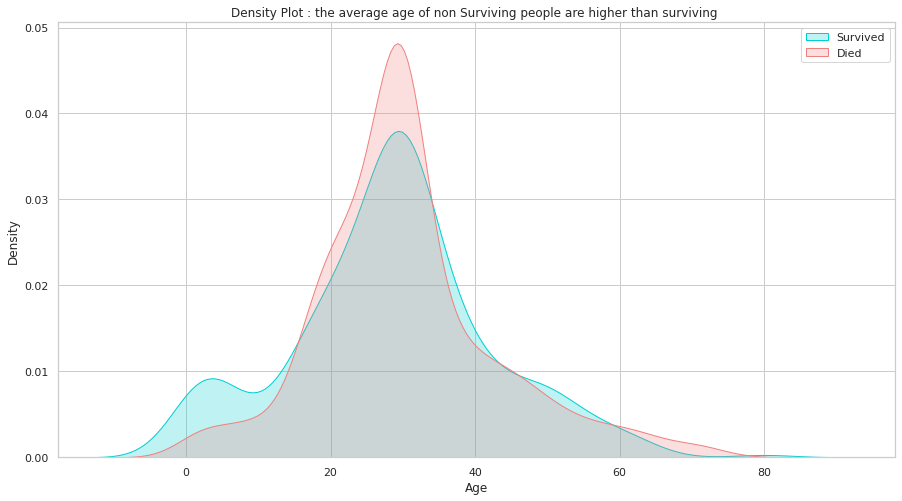

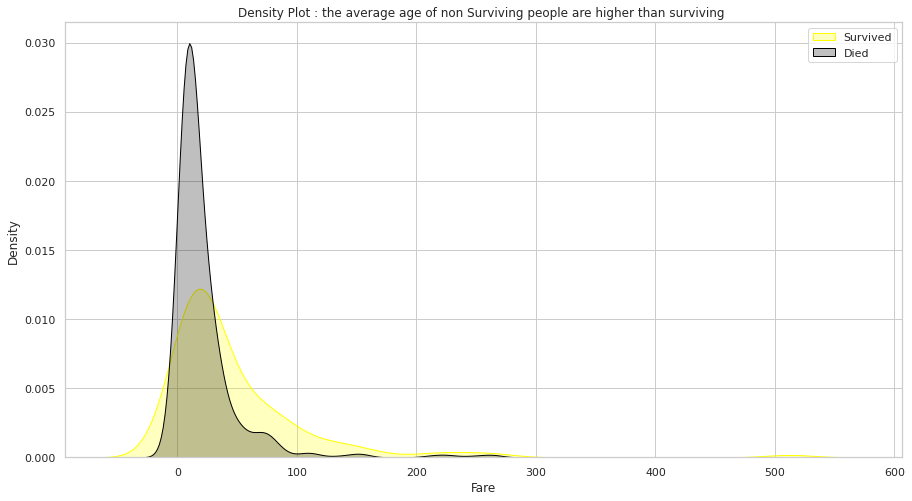

In [ ]:
a = data[data['Survived'] == True]['Age'].mean() 
b = data[data['Survived'] == False]['Age'].mean()
if a>b:
  print('Ні, середній вік загинувших нижчий')
if a<b:
  print('Так, середній вік загинувших вищий')
else:
  print('Ні, середній вік однаковий')
plt.figure(figsize=(15,8))
sns.kdeplot(data["Age"][data.Survived == 1], color="darkturquoise", shade=True)
sns.kdeplot(data["Age"][data.Survived == 0], color="lightcoral", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot : the average age of non Surviving people are higher than surviving ')
plt.show()

plt.figure(figsize=(15,8))
sns.kdeplot(data["Fare"][data.Survived == 1], color="yellow", shade=True)
sns.kdeplot(data["Fare"][data.Survived == 0], color="black", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot : the average age of non Surviving people are higher than surviving ')
plt.show()

**8. Як відрізняються середній вік чоловіків / жінок в залежності від класа обслуговування? Виберіть правильне твердження:**
- В середньому чоловіки 1-го класу старше 40 років
- В середньому жінки 1-го класу старше 40 років
- Чоловіки всіх класів в середньому старше жінок того ж класу
- В середньому люди в 1 класі старше, ніж в 2-ому, а ті старше представників 3-го класу

In [ ]:
fare_by_class_sex = data.groupby(['Pclass', 'Sex'])['Age'].mean()
print(fare_by_class_sex)
print('В середньому люди в 1 класі старше, ніж в 2-ому, а ті старше представників 3-го класу')

Pclass  Sex   
1       female    34.141405
        male      39.287717
2       female    28.748661
        male      30.653908
3       female    24.068493
        male      27.372153
Name: Age, dtype: float64
В середньому люди в 1 класі старше, ніж в 2-ому, а ті старше представників 3-го класу
